# MNIST Dataset - The *Hello World!* of Deep Learning

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the MNIST Dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Basic Check:

In [3]:
print('Shape of the training set:', x_train.shape)
print('Shape of the test set:', x_test.shape)

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In the training set, there are 60,000 handwritten images - each image being 28 by 28 pixels.
In the test set, there are 10,000 handwritten images.

Let's check the 10th image in the training set, for example:

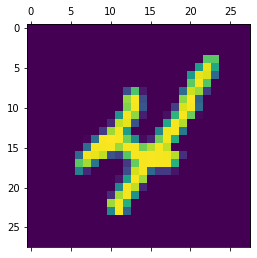

In [4]:
plt.matshow(x_train[9])
plt.show()

The image corresponds to a 4, which may be confirmed by the respective label in y_train:

In [5]:
print('The label of the 10th image:', y_train[9])

The label of the 10th image: 4


Let's scale the data:

In [6]:
x_train = x_train / 255
x_test = x_test / 255

Now, for training the data in a Neural Network, we want a *single layer* of Input - meaning that we have to flatten the 28 by 28 pixels (which is essentially a matrix, if you will) into 28*28 = 784 pixels: 

In [7]:
x_train_flattened = x_train.reshape(len(x_train), 784)
x_test_flattened = x_test.reshape(len(x_test), 784)

# Optional Check
print('Shape of the flattened training set:', x_train_flattened.shape)
print('Shape of the flattened test set:', x_test_flattened.shape)

Shape of the flattened training set: (60000, 784)
Shape of the flattened test set: (10000, 784)


## Keras - Base Model

Let's create a single layer as our base model and check the accuracy of the network.

Key Takeaways:
1. Sequential: You can stack layers of neurons together using Sequential Model. It is Continuous.
2. Dense: Every neuron in one layer have connections to every neuron in the next layer. Hence, the neural network is "Dense".

In [8]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 5, verbose = 2)

Epoch 1/5
1875/1875 - 5s - loss: 0.4657 - accuracy: 0.8799 - 5s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.3030 - accuracy: 0.9154 - 5s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 5s - loss: 0.2833 - accuracy: 0.9209 - 5s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 6s - loss: 0.2729 - accuracy: 0.9238 - 6s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.2666 - accuracy: 0.9257 - 5s/epoch - 3ms/step


Evaluate the data on the test set:

In [9]:
score = model.evaluate(x_test_flattened, y_test, verbose = 2)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 - 1s - loss: 0.2691 - accuracy: 0.9252 - 611ms/epoch - 2ms/step
Test loss: 0.2691252827644348
Test accuracy: 0.9251999855041504


Predict the first test image:

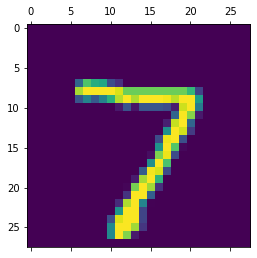

In [10]:
plt.matshow(x_test[0])
plt.show()

In [11]:
y_predict = model.predict(x_test_flattened, verbose = 2)
y_predict[0]

313/313 - 0s - 379ms/epoch - 1ms/step


array([5.7166308e-02, 5.2446734e-07, 7.5355507e-02, 9.8025388e-01,
       5.6252885e-03, 2.6512045e-01, 3.9700399e-06, 9.9991190e-01,
       1.4362794e-01, 8.4721297e-01, 4.8692382e-05, 5.3642892e-05,
       3.0975880e-05, 7.5649245e-05, 6.5960623e-05, 6.2155326e-05],
      dtype=float32)

The above values actually gives you the predicted classes. To get the predicted digit, we use argmax:

In [12]:
print('The predicted digit is:', np.argmax(y_predict[0]))

The predicted digit is: 7


### Confusion Matrix

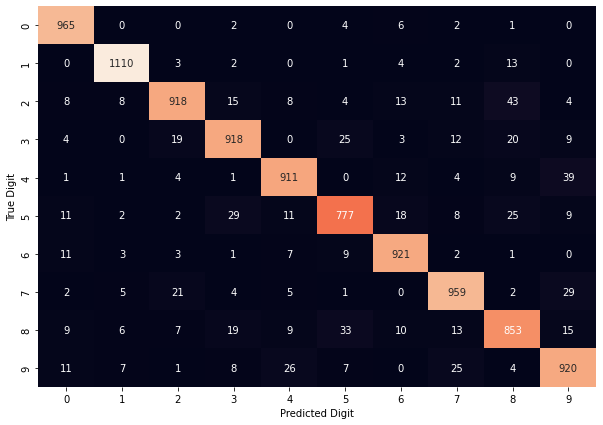

In [13]:
y_predict_labels = [np.argmax(value) for value in y_predict]
confusion_matrix = tf.math.confusion_matrix(labels = y_test, 
                                             predictions = y_predict_labels)

plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar=False)
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()

## Keras - Improved Model

Let's try to estimate the actual number of neurons that you require in the first dense layer using the following formula:

```r
Units = {Flattened_Input + 1} / 2
```
For our input of 784 neurons that composes the Input layer:
```r
Units = {784 + 1} / 2 = 393
```

Moreover, we can let Keras Flatten the Input for us:

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(393, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 5, verbose = 2)

Epoch 1/5
1875/1875 - 4s - loss: 0.2066 - accuracy: 0.9396 - 4s/epoch - 2ms/step
Epoch 2/5
1875/1875 - 3s - loss: 0.0838 - accuracy: 0.9744 - 3s/epoch - 2ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.0555 - accuracy: 0.9832 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 3s - loss: 0.0384 - accuracy: 0.9876 - 3s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 3s - loss: 0.0287 - accuracy: 0.9908 - 3s/epoch - 2ms/step


In [15]:
score = model.evaluate(x_test, y_test, verbose = 2)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 - 1s - loss: 0.0749 - accuracy: 0.9778 - 700ms/epoch - 2ms/step
Test loss: 0.0748569592833519
Test accuracy: 0.9778000116348267


313/313 - 0s - 450ms/epoch - 1ms/step


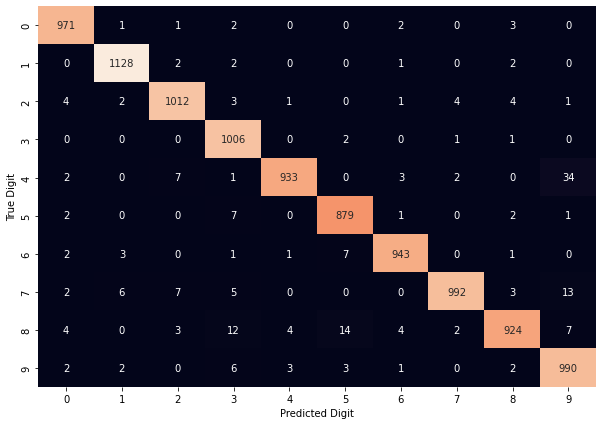

In [16]:
y_predict = model.predict(x_test, verbose = 2)
y_predict_labels = [np.argmax(value) for value in y_predict]
confusion_matrix = tf.math.confusion_matrix(labels = y_test, 
                                             predictions = y_predict_labels)

plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar=False)
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()

# Conclusion

1. With a Base model consisting of just one Hidden Layer, it was possible to achieve close to 90% test accuracy.
2. With a so-called improved model - refined using a formula that estimates the number of hidden layers required for the first dense layer and addition of an output layer - it was possible to get a test accuracy of 97%. 

# Footnotes

1. This exercise is to be regarded as an introduction to Deep Learning and Neural Networks.
2. Tweaking the loss (for example, SGD optimizer) and/or changing the activation function may yield even better accuracy. 